In [1]:
import matplotlib.pyplot as plt
from pprint import pprint
import MEArec as mr

In [2]:
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.curation as scur
import spikeinterface.widgets as sw


In [3]:
import cus_sort.custom_sorter
import importlib
importlib.reload(cus_sort.custom_sorter)

✓ myspikesorter package imported: 0.1.0
Registered myspikesorter. Installed: True
✓ myspikesorter successfully registered!
✓ myspikesorter package imported: 0.1.0
Registered myspikesorter. Installed: True
✓ myspikesorter successfully registered!


<module 'cus_sort.custom_sorter' from '/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/cus_sort/custom_sorter.py'>

In [4]:
global_job_kwargs = dict(n_jobs=4, chunk_duration="1s")
si.set_global_job_kwargs(**global_job_kwargs)

In [5]:
# Check if cell models folder exists
cell_models_folder = mr.get_default_cell_models_folder()
print(f"Cell models folder: {cell_models_folder}")

Cell models folder: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp


In [6]:
# Try to load existing templates first
try:
    tempgen = mr.load_templates('templates.h5')
    print("Loaded existing templates")
except:
    print("No existing templates found. Need to generate new ones.")

Loaded existing templates


In [7]:
# Get default parameters and modify minimally
templates_params = mr.get_default_templates_params()
templates_params['probe'] = 'tetrode'
templates_params['n'] = 5  # Start with fewer cells
templates_params['seed'] = 0

# Try with verbose output to see what's happening
try:
    cell_models_folder = mr.get_default_cell_models_folder()
    tempgen = mr.gen_templates(
        cell_models_folder=cell_models_folder,
        params=templates_params,
        verbose=True
    )
    mr.save_template_generator(tempgen, 'templates.h5')
    print("Success!")
except Exception as e:
    print(f"Error: {e}")
    print("Try using CLI: mearec gen-templates")

Setting n_jobs to 10 CPUs
Running with 10 jobs


Starting simulation 8/13 - cell: L5_NGC_bNAC219_1

Starting simulation 9/13 - cell: L5_SBC_bNAC219_1

Starting simulation 5/13 - cell: L5_LBC_bAC217_1

Starting simulation 1/13 - cell: L5_BP_bAC217_1

Starting simulation 2/13 - cell: L5_BTC_bAC217_1

Starting simulation 4/13 - cell: L5_DBC_bAC217_1

Starting simulation 3/13 - cell: L5_ChC_cACint209_1

Starting simulation 6/13 - cell: L5_MC_bAC217_1

Starting simulation 7/13 - cell: L5_NBC_bAC217_1

Starting simulation 10/13 - cell: L5_STPC_cADpyr232_1

Intracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_LBC_bAC217_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_LBC_bAC217_1
Intracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_SBC_bNAC219_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /Users/eashanmonga/.config/mearec/1

In [ ]:
# Use simpler parameters that don't require complex cell models
templates_params = mr.get_default_templates_params()
templates_params['probe'] = 'tetrode'
templates_params['n'] = 5
templates_params['cell_types'] = ['simple']  # Use simple cell types

try:
    cell_models_folder = mr.get_default_cell_models_folder()
    tempgen = mr.gen_templates(
        cell_models_folder=cell_models_folder,
        params=templates_params,
        verbose=True
    )
    mr.save_template_generator(tempgen, 'data/sim_data/templates.h5')
    print("Success with simple cell types!")
except Exception as e:
    print(f"Error: {e}")


Setting n_jobs to 10 CPUs
Running with 10 jobs
Starting simulation 1/13 - cell: L5_BP_bAC217_1

Starting simulation 2/13 - cell: L5_BTC_bAC217_1

Starting simulation 3/13 - cell: L5_ChC_cACint209_1

Starting simulation 4/13 - cell: L5_DBC_bAC217_1

Starting simulation 5/13 - cell: L5_LBC_bAC217_1

Starting simulation 6/13 - cell: L5_MC_bAC217_1

Starting simulation 7/13 - cell: L5_NBC_bAC217_1

Starting simulation 8/13 - cell: L5_NGC_bNAC219_1

Starting simulation 9/13 - cell: L5_SBC_bNAC219_1

Starting simulation 10/13 - cell: L5_STPC_cADpyr232_1

Intracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_ChC_cACint209_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_ChC_cACint209_1
Intracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_DBC_bAC217_1



Cell has already be simulated. Using stored membrane currents



Extracell

In [ ]:
# Load the generated templates
tempgen = mr.load_templates('/Users/eashanmonga/.config/mearec/1.9.2/templates/physrot/templates_5_tetrode_02-06-2025_02-36.h5')

# Generate recordings with fewer spike trains
recordings_params = mr.get_default_recordings_params()
recordings_params['spiketrains']['n_exc'] = 3  # Reduced from 5
recordings_params['spiketrains']['n_inh'] = 2  # Reduced from 5
recordings_params['spiketrains']['duration'] = 60
recordings_params['recordings']['noise_level'] = 10

recgen = mr.gen_recordings(
    tempgen=tempgen,
    params=recordings_params,
)

# Save recordings
mr.save_recording_generator(recgen, 'recordings.h5')

Spiketrains seed:  3450
dtype float32
Noise Level  10
Templates selection seed:  4440
Selecting cells
Padding template edges
Elapsed pad time: 0.011289834976196289
Creating time jittering
Elapsed jitter time: 0.008970975875854492
Smoothing templates
Computing spike train SNR
Adding spiketrain annotations
Convolution seed:  6843
Electrode modulaton
Adding noise
Noise seed:  4029
Filtering
Band-pass cutoff [ 300. 6000.] Hz
Elapsed time:  0.46309129200017196


Recording shape: (1920000, 4)
Number of templates: 65
Sampling rate: 32000.0 Hz
Duration: 60.0 seconds


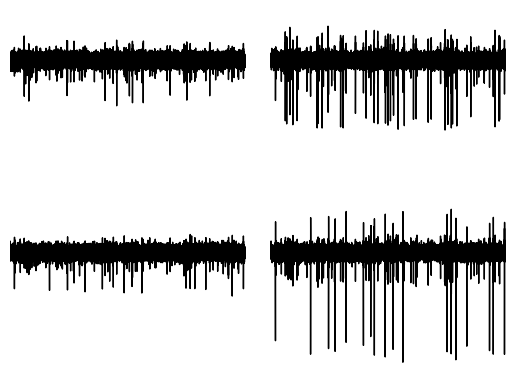

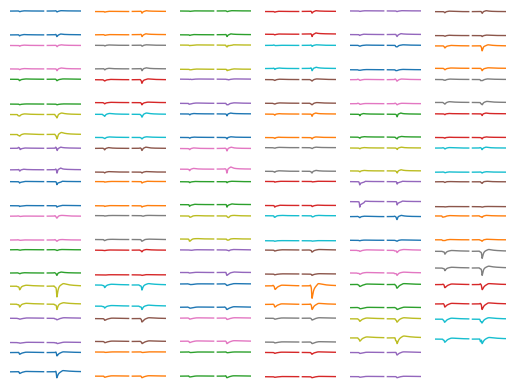

Number of neurons: 5
Neuron 0: 329 spikes
Neuron 1: 288 spikes
Neuron 2: 310 spikes
Neuron 3: 701 spikes
Neuron 4: 658 spikes


In [31]:
import matplotlib.pyplot as plt

# Load your generated data
tempgen = mr.load_templates('templates.h5')
recgen = mr.load_recordings('recordings.h5')

# Inspect the data
print(f"Recording shape: {recgen.recordings.shape}")
print(f"Number of templates: {tempgen.templates.shape[0]}")
print(f"Sampling rate: {recgen.info['recordings']['fs']} Hz")
print(f"Duration: {recgen.info['recordings']['duration']} seconds")

# Plot the recordings
mr.plot_recordings(recgen, start_time=0, end_time=2)  # Plot first 2 seconds
plt.show()

# Plot templates
mr.plot_templates(tempgen)
plt.show()

# Access ground truth spike times
spike_times = recgen.spiketrains
print(f"Number of neurons: {len(spike_times)}")
for i, spikes in enumerate(spike_times):
    print(f"Neuron {i}: {len(spikes)} spikes")


In [12]:
# Load your generated MEArec data
recording, sorting_true = se.read_mearec('recordings.h5')

print(recording)
print(sorting_true)


MEArecRecordingExtractor: 4 channels - 32.0kHz - 1 segments - 1,920,000 samples 
                          60.00s (1.00 minutes) - float32 dtype - 29.30 MiB
  file_path: /Users/eashanmonga/PycharmProjects/STATS320_FinalProject/recordings.h5
MEArecSortingExtractor: 5 units - 1 segments - 32.0kHz
  file_path: /Users/eashanmonga/PycharmProjects/STATS320_FinalProject/recordings.h5


Channel ids: ['1' '2' '3' '4']
Sampling frequency: 32000.0
Number of channels: 4
Number of segments: 1
Unit ids: ['#0' '#1' '#2' '#3' '#4']
Spike train of first unit: [   5476    7284    9758   14269   16510   20306   31620   56016   61030
   68972   70305   70453   79071   81999   83208   83961   88610   92874
   94238  104773  112072  160632  167263  167401  174785  179581  190104
  190478  191385  206994  209970  210762  217065  218835  222539  223127
  229028  235933  237798  243121  244813  249266  250931  264664  266877
  267451  270078  280907  291128  295003  304222  309495  315001  317476
  334729  348362  359483  372967  379596  385829  389564  397347  397433
  407188  414641  416897  421303  429926  433321  444007  449896  466727
  473374  483542  484026  489756  493600  498969  510671  515518  521526
  543240  545360  548677  552528  561517  565662  570869  575173  576710
  579134  588579  588783  592925  594733  597609  606672  621451  638061
  652442  658436  659645  6632

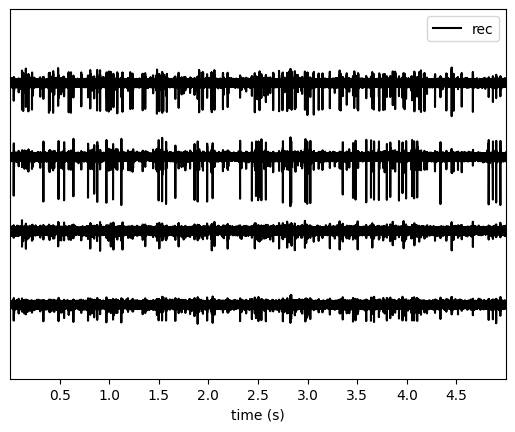

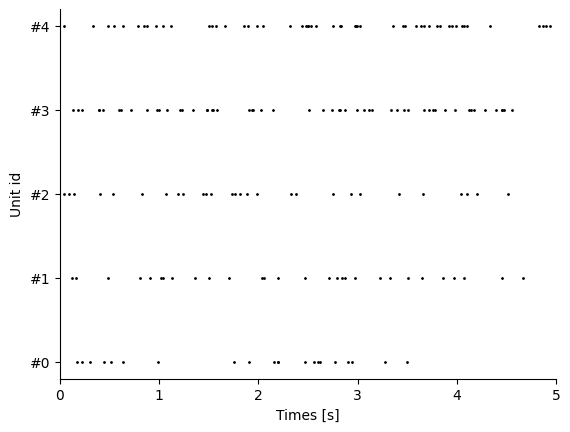

In [13]:
# Visualize traces and raster plots
w_ts = sw.plot_traces(recording, time_range=(0, 5))
w_rs = sw.plot_rasters(sorting_true, time_range=(0, 5))

# Get recording information
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_seg = recording.get_num_segments()

print("Channel ids:", channel_ids)
print("Sampling frequency:", fs)
print("Number of channels:", num_chan)
print("Number of segments:", num_seg)

# Get sorting information
unit_ids = sorting_true.get_unit_ids()
spike_train = sorting_true.get_unit_spike_train(unit_id=unit_ids[0])

print("Unit ids:", unit_ids)
print("Spike train of first unit:", spike_train)


Probe - 4ch - 1shanks


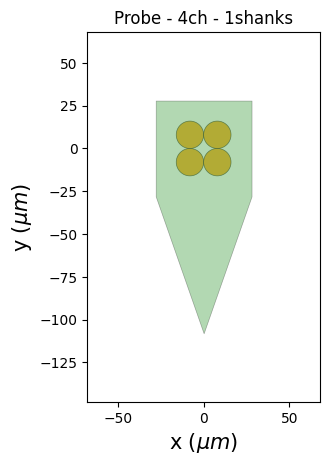

In [14]:
# Check probe information
probe = recording.get_probe()
print(probe)

from probeinterface.plotting import plot_probe
_ = plot_probe(probe)
plt.show()


In [15]:
# Apply preprocessing (your MEArec data is already filtered, but we can apply additional steps)
recording_f = spre.bandpass_filter(recording, freq_min=300, freq_max=6000)
recording_cmr = spre.common_reference(recording_f, reference="global", operator="median")

# Save preprocessed recording
recording_preprocessed = recording_cmr.save(format="binary")
print(recording_preprocessed)


Use cache_folder=/var/folders/5w/gj94wfqd7mg6xbx29r02m2140000gp/T/spikeinterface_cache/tmpe3hoech9/ZDRN9B2O
write_binary_recording 
engine=process - n_jobs=4 - samples_per_chunk=32,000 - chunk_memory=500.00 KiB - total_memory=1.95 MiB - chunk_duration=1.00s


write_binary_recording (workers: 4 processes):   0%|          | 0/60 [00:00<?, ?it/s]

BinaryFolderRecording: 4 channels - 32.0kHz - 1 segments - 1,920,000 samples 
                       60.00s (1.00 minutes) - float32 dtype - 29.30 MiB


In [16]:
print("Available sorters:", ss.available_sorters())
print("Installed sorters:", ss.installed_sorters())

Available sorters: ['combinato', 'hdsort', 'herdingspikes', 'ironclust', 'kilosort', 'kilosort2', 'kilosort2_5', 'kilosort3', 'kilosort4', 'klusta', 'mountainsort4', 'mountainsort5', 'myspikesorter', 'pykilosort', 'simple', 'spykingcircus', 'spykingcircus2', 'tridesclous', 'tridesclous2', 'waveclus', 'waveclus_snippets', 'yass']
Installed sorters: ['mountainsort5', 'simple', 'spykingcircus2', 'tridesclous2']


In [17]:
# Check parameters for a sorter
if 'tridesclous' in ss.installed_sorters():
    print("Tridesclous params:")
    pprint(ss.get_default_sorter_params("tridesclous"))
    
    # Run Tridesclous
    sorting_TDC = ss.run_sorter(
        sorter_name="tridesclous", 
        recording=recording_preprocessed, 
        detect_threshold=4
    )
    print(sorting_TDC)

# If SpykingCircus2 is available
if 'spykingcircus2' in ss.installed_sorters():
    sorting_SC2 = ss.run_sorter(
        sorter_name="spykingcircus2", 
        recording=recording_preprocessed,
        remove_existing_folder=True,
        folder='sorting_output/spykingcircus2',
    )
    print(sorting_SC2)

/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/easha

NumpyFolder (NumpyFolderSorting): 7 units - 1 segments - 32.0kHz


In [18]:
# Create SortingAnalyzer (using the first sorter result)
analyzer = si.create_sorting_analyzer(
    sorting=sorting_SC2, 
    recording=recording_preprocessed, 
    format='binary_folder', 
    folder='analyzer_binary',
    overwrite=True
)

# Compute multiple extensions at once
extensions_to_compute = [
    "random_spikes",
    "waveforms", 
    "noise_levels",
    "templates",
    "spike_amplitudes",
    "unit_locations",
    "spike_locations",
    "correlograms",
    "template_similarity"
]

extension_params = {
    "unit_locations": {"method": "center_of_mass"},
    "spike_locations": {"ms_before": 0.1},
    "correlograms": {"bin_ms": 0.1},
    "template_similarity": {"method": "cosine_similarity"}
}

analyzer.compute(extensions_to_compute, extension_params=extension_params)

estimate_sparsity (workers: 4 processes):   0%|          | 0/60 [00:00<?, ?it/s]

/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/spikeinterface/core/basesorting.py:261: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


compute_waveforms (workers: 4 processes):   0%|          | 0/60 [00:00<?, ?it/s]

noise_level (workers: 4 processes):   0%|          | 0/20 [00:00<?, ?it/s]

Compute : spike_amplitudes + spike_locations (workers: 4 processes):   0%|          | 0/60 [00:00<?, ?it/s]

In [19]:
# Compute quality metrics
qm_params = sqm.get_default_qm_params()

# Adjust parameters for your recording duration
qm_params["presence_ratio"]["bin_duration_s"] = 10  # Adjust based on your recording length
qm_params["amplitude_cutoff"]["num_histogram_bins"] = 10
qm_params["drift"]["interval_s"] = 10
qm_params["drift"]["min_spikes_per_interval"] = 5

analyzer.compute("quality_metrics", qm_params)
qm_data = analyzer.get_extension("quality_metrics").get_data()
print(qm_data)


/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:910: UserWarning: Some units have too few spikes : amplitude_cutoff is set to NaN
  warnings.warn(f"Some units have too few spikes : amplitude_cutoff is set to NaN")
/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:1066: UserWarning: The recording is too short given the specified 'interval_s' and 'min_num_bins'. Drift metrics will be set to NaN
  warnings.warn(


noise_level (workers: 4 processes):   0%|          | 0/20 [00:00<?, ?it/s]

   num_spikes  firing_rate  presence_ratio        snr  isi_violations_ratio  \
0        7453   124.216667             1.0   3.623862              0.494714   
1        7664   127.733333             1.0   3.517895              0.552634   
4        3232    53.866667             1.0   3.778487              0.758198   
5         658    10.966667             1.0  26.812955              0.000000   
6        4873    81.216667             1.0   3.474573              0.571040   
7         286     4.766667             1.0  11.393535              0.000000   
8         699    11.650000             1.0  14.249254              0.000000   

   isi_violations_count  rp_contamination  rp_violations  \
0                1374.0               1.0         1067.0   
1                1623.0               1.0         1341.0   
4                 396.0               1.0          323.0   
5                   0.0               0.0            0.0   
6                 678.0               1.0          499.0   
7      

/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/spikeinterface/widgets/metrics.py:66: UserWarning: Skipping ['drift_ptp', 'drift_std', 'drift_mad'] because they contain all NaNs
  warnings.warn(f"Skipping {nan_metrics} because they contain all NaNs")


Plotting individual components...


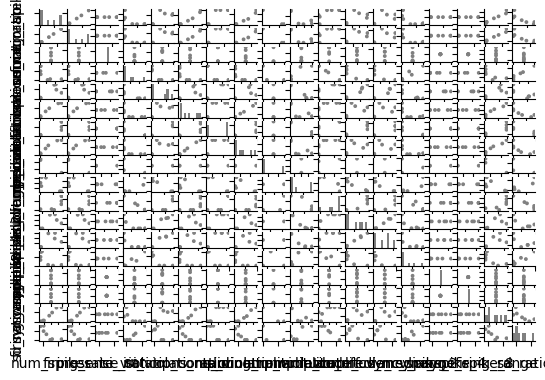

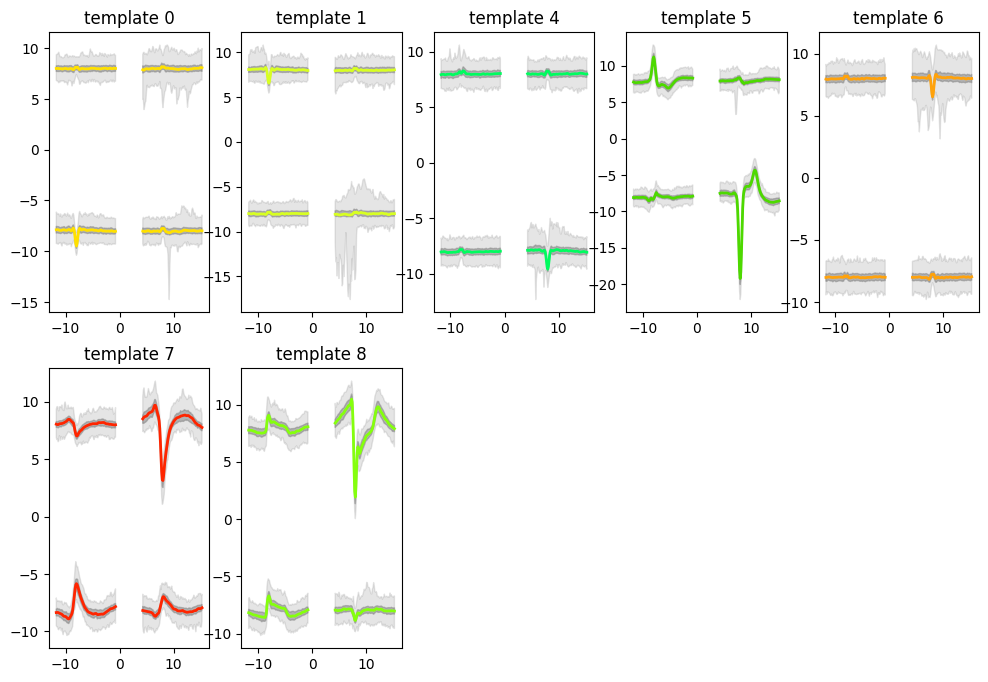

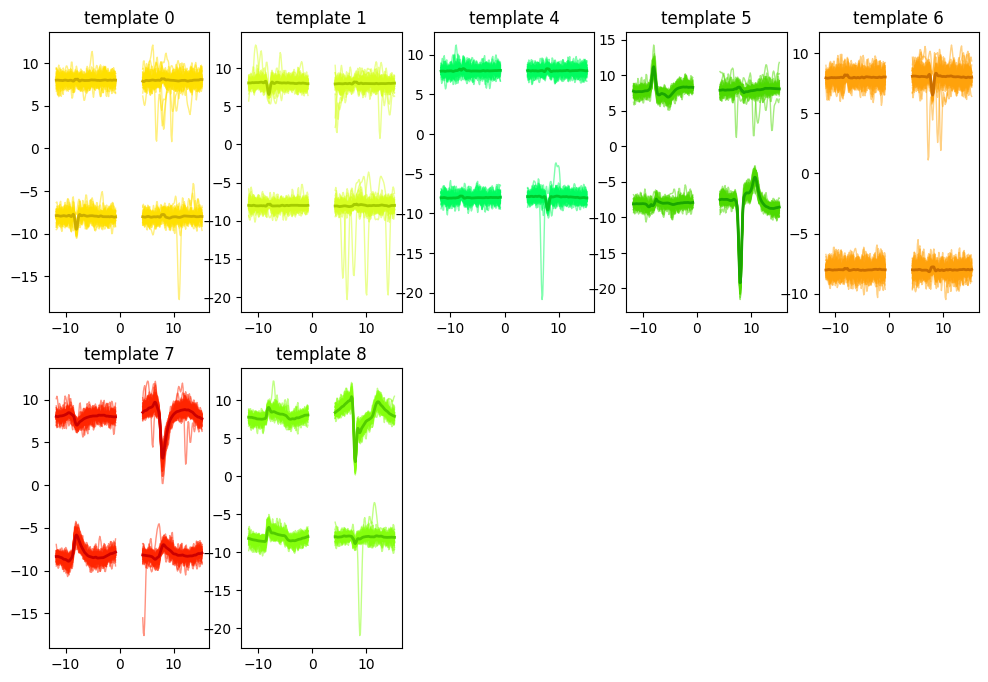

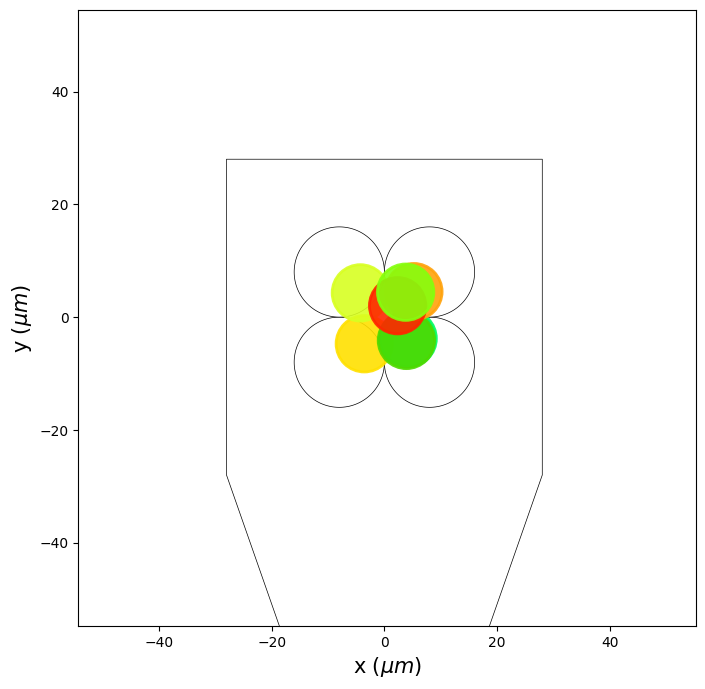

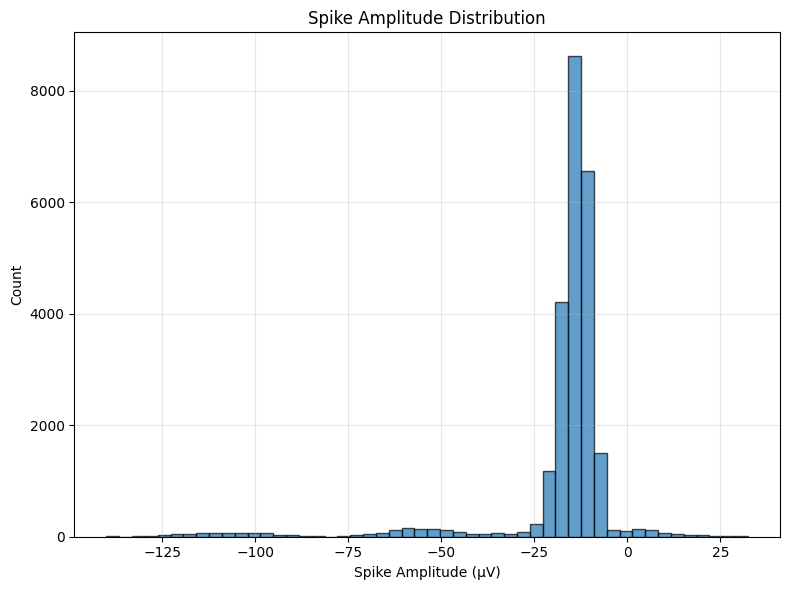

In [20]:

# Plot quality metrics (works with matplotlib)
w1 = sw.plot_quality_metrics(analyzer)

# Skip sorting summary and use individual plots instead
print("Plotting individual components...")

# Plot unit templates
w_templates = sw.plot_unit_templates(analyzer, figsize=(12, 8))

# Plot unit waveforms
w_waveforms = sw.plot_unit_waveforms(analyzer, figsize=(12, 8))

# Plot unit locations if available
try:
    w_locations = sw.plot_unit_locations(analyzer, figsize=(8, 8))
except:
    print("Unit locations not available")

# Plot spike amplitudes histogram
amplitudes = analyzer.get_extension("spike_amplitudes").get_data()
plt.figure(figsize=(8, 6))
plt.hist(amplitudes, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Spike Amplitude (µV)')
plt.ylabel('Count')
plt.title('Spike Amplitude Distribution')
plt.grid(True, alpha=0.3)

# Show all plots
plt.tight_layout()
plt.show()

Sorting Performance:
            accuracy    recall precision false_discovery_rate miss_rate
gt_unit_id                                                             
#0                 0         0         0                    0         0
#1          0.993056  0.993056       1.0                  0.0  0.006944
#2                 0         0         0                    0         0
#3          0.997147  0.997147       1.0                  0.0  0.002853
#4               1.0       1.0       1.0                  0.0       0.0


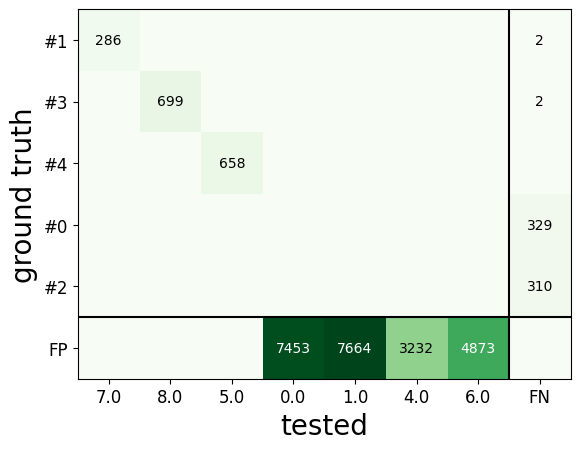

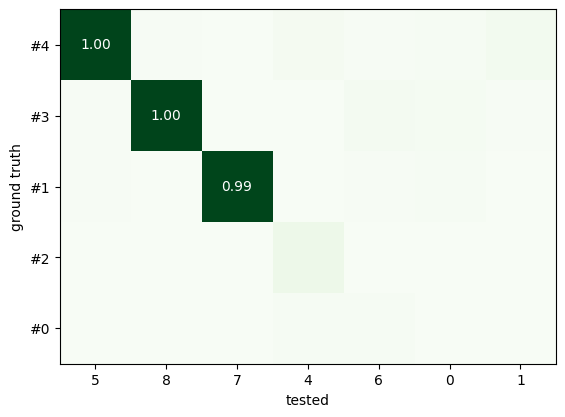

In [21]:
# Compare your spike sorting results with ground truth
comp_gt = sc.compare_sorter_to_ground_truth(
    gt_sorting=sorting_true, 
    tested_sorting=sorting_SC2
)

# Get performance metrics
performance = comp_gt.get_performance()
print("Sorting Performance:")
print(performance)

# Plot confusion matrix
w_conf = sw.plot_confusion_matrix(comp_gt)
w_agr = sw.plot_agreement_matrix(comp_gt)

In [ ]:
# Example: Run mountainsort via Docker
sorting_MS5 = ss.run_sorter(
    sorter_name="mountainsort5", 
    recording=recording,
    remove_existing_folder=True,
    folder='sorting_output/mountainsort5' 
)


write_binary_recording 
engine=process - n_jobs=4 - samples_per_chunk=32,000 - chunk_memory=500.00 KiB - total_memory=1.95 MiB - chunk_duration=1.00s
Using training recording of duration 300 sec with the sampling mode uniform
*** MS5 Elapsed time for SCHEME2 get_sampled_recording_for_training: 0.000 seconds ***
Running phase 1 sorting
Number of channels: 4
Number of timepoints: 1920000
Sampling frequency: 32000.0 Hz
Channel 0: [-8. -8.]
Channel 1: [-8.  8.]
Channel 2: [ 8. -8.]
Channel 3: [8. 8.]
Loading traces
*** MS5 Elapsed time for load_traces: 0.003 seconds ***
Detecting spikes

Adjacency for detect spikes with channel radius 200
[[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]

m = 0 (nbhd size: 4)
m = 1 (nbhd size: 4)
m = 2 (nbhd size: 4)
m = 3 (nbhd size: 4)
Detected 1634 spikes
*** MS5 Elapsed time for detect_spikes: 0.040 seconds ***
Removing duplicate times
*** MS5 Elapsed time for remove_duplicate_times: 0.000 seconds ***
Extracting 1634 snippets
*** MS5 Elapsed tim

In [25]:
(ss.installed_sorters())

['mountainsort5', 'simple', 'spykingcircus2', 'tridesclous2']

Sorting Performance:
            accuracy    recall precision false_discovery_rate miss_rate
gt_unit_id                                                             
#0                 0         0         0                    0         0
#1          0.979239  0.982639  0.996479             0.003521  0.017361
#2                 0         0         0                    0         0
#3           0.97017  0.974322  0.995627             0.004373  0.025678
#4               1.0       1.0       1.0                  0.0       0.0


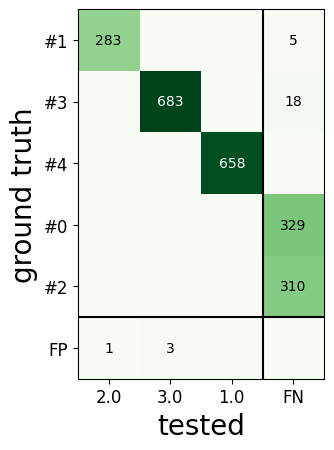

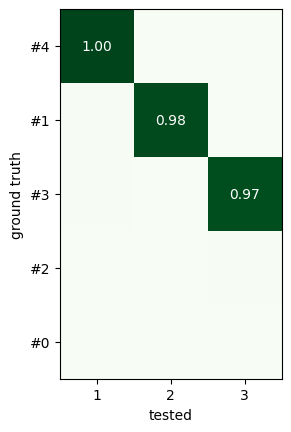

In [26]:
# Compare your spike sorting results with ground truth
comp_gt = sc.compare_sorter_to_ground_truth(
    gt_sorting=sorting_true, 
    tested_sorting=sorting_MS5
)

# Get performance metrics
performance = comp_gt.get_performance()
print("Sorting Performance:")
print(performance)

# Plot confusion matrix
w_conf = sw.plot_confusion_matrix(comp_gt)
w_agr = sw.plot_agreement_matrix(comp_gt)

In [ ]:
sorting_customTEST = ss.run_sorter(
    sorter_name="myspikesorter", 
    recording=recording_preprocessed,
    remove_existing_folder=True,
    folder='sorting_output/myspikesorter',
)


NumpySorting: 4 units - 1 segments - 32.0kHz


Sorting Performance:
           accuracy    recall precision false_discovery_rate miss_rate
gt_unit_id                                                            
#0                0         0         0                    0         0
#1                0         0         0                    0         0
#2                0         0         0                    0         0
#3                0         0         0                    0         0
#4          0.51688  0.674772  0.688372             0.311628  0.325228


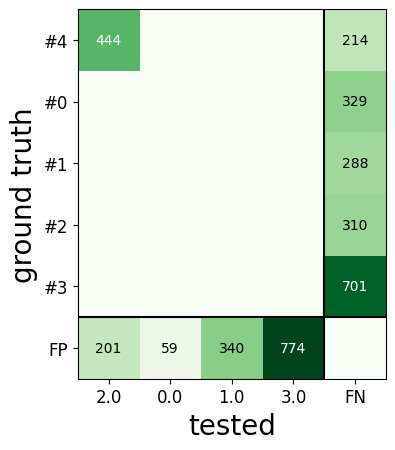

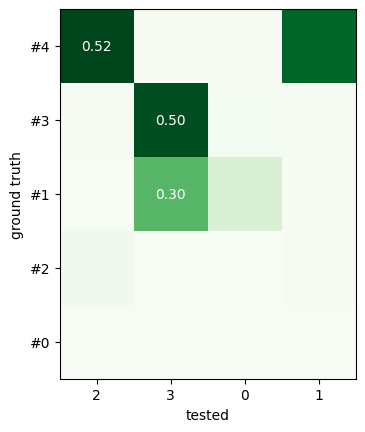

In [28]:
# Compare your spike sorting results with ground truth
comp_gt = sc.compare_sorter_to_ground_truth(
    gt_sorting=sorting_true, 
    tested_sorting=sorting_customTEST
)

# Get performance metrics
performance = comp_gt.get_performance()
print("Sorting Performance:")
print(performance)

# Plot confusion matrix
w_conf = sw.plot_confusion_matrix(comp_gt)
w_agr = sw.plot_agreement_matrix(comp_gt)

In [ ]:
pprint(mr.get_default_templates_params())



{'beta_distr_params': [1.5, 5],
 'check_eap_shape': True,
 'check_for_drift_amp': False,
 'cut_out': [2, 5],
 'delay': 10,
 'drift_steps': 31,
 'drift_within_bounds': False,
 'drift_xlim': [-10, 10],
 'drift_ylim': [-10, 10],
 'drift_zlim': [30, 80],
 'drifting': False,
 'dt': 0.03125,
 'max_drift': 100,
 'max_iterations': 1000,
 'min_amp': 30,
 'min_drift': 30,
 'n': 50,
 'ncontacts': 10,
 'offset': 0,
 'overhang': 30,
 'probe': 'Neuronexus-32',
 'rot': 'physrot',
 'seed': None,
 'sim_time': 1,
 'target_spikes': [3, 50],
 'timeout': None,
 'weights': [0.25, 1.75],
 'x_distr': 'uniform',
 'xlim': [10, 80],
 'ylim': None,
 'zlim': None}
{'cell_types': {'excitatory': ['PC', 'SS', 'SP'],
                'inhibitory': ['AC',
                               'BP',
                               'BC',
                               'BTC',
                               'ChC',
                               'DBC',
                               'MC',
                               'NGC']},
 're

In [30]:
pprint(mr.get_default_recordings_params())

{'cell_types': {'excitatory': ['PC', 'SS', 'SP'],
                'inhibitory': ['AC',
                               'BP',
                               'BC',
                               'BTC',
                               'ChC',
                               'DBC',
                               'MC',
                               'NGC']},
 'recordings': {'adc_bit_depth': None,
                'angle_tol': 15,
                'bursting': False,
                'bursting_units': None,
                'chunk_duration': 10,
                'color_noise_floor': 1,
                'color_peak': 300,
                'color_q': 2,
                'drift_fs': 100,
                'drift_mode_probe': 'rigid',
                'drift_mode_speed': 'slow',
                'drifting': False,
                'dtype': 'float32',
                'exp_decay': 0.2,
                'extract_waveforms': False,
                'far_neurons_exc_inh_ratio': 0.8,
                'far_neurons_max_amp'